In [1]:
import networkx as nx

In [2]:
help(nx.erdos_renyi_graph)

Help on function gnp_random_graph in module networkx.generators.random_graphs:

gnp_random_graph(n, p, seed=None, directed=False)
    Returns a $G_{n,p}$ random graph, also known as an Erdős-Rényi graph
    or a binomial graph.
    
    The $G_{n,p}$ model chooses each of the possible edges with probability $p$.
    
    Parameters
    ----------
    n : int
        The number of nodes.
    p : float
        Probability for edge creation.
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.
    directed : bool, optional (default=False)
        If True, this function returns a directed graph.
    
    See Also
    --------
    fast_gnp_random_graph
    
    Notes
    -----
    This algorithm [2]_ runs in $O(n^2)$ time.  For sparse graphs (that is, for
    small values of $p$), :func:`fast_gnp_random_graph` is a faster algorithm.
    
    :func:`binomial_graph` and :func:`erdos_renyi_graph` are

In [7]:
help(nx.draw)

Help on function draw in module networkx.drawing.nx_pylab:

draw(G, pos=None, ax=None, **kwds)
    Draw the graph G with Matplotlib.
    
    Draw the graph as a simple representation with no node
    labels or edge labels and using the full Matplotlib figure area
    and no axis labels by default.  See draw_networkx() for more
    full-featured drawing that allows title, axis labels etc.
    
    Parameters
    ----------
    G : graph
        A networkx graph
    
    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.
    
    ax : Matplotlib Axes object, optional
        Draw the graph in specified Matplotlib axes.
    
    kwds : optional keywords
        See networkx.draw_networkx() for a description of optional keywords.
    
    Examples
    --------
    >>> G = nx.dodecahe

In [10]:
%matplotlib inline

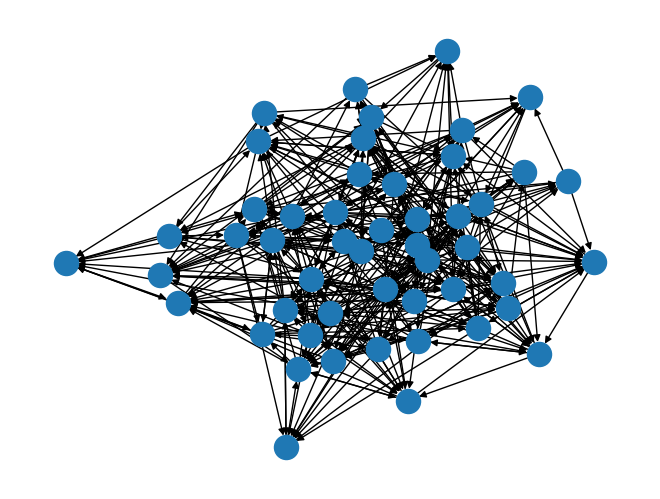

In [16]:
import matplotlib.pyplot as plt
n = 50
p = 0.15
er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=True)
# dir(er)
nx.draw(er)
plt.show()

/tmp/ipykernel_70/3498649647.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(er)


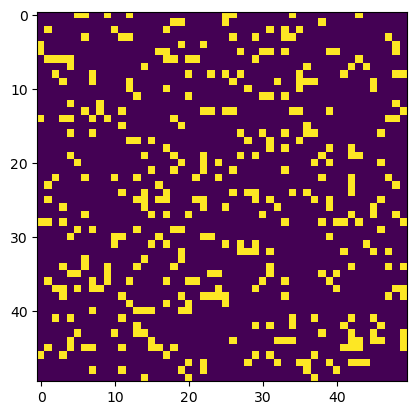

In [27]:
A = nx.adjacency_matrix(er)
# A
plt.imshow(A.todense())
plt.show()

In [28]:
Adense = A.todense()
W = Adense.copy()
n_con = 0
n_div = 0
n_ch  = 0
for i in range(n):
    for j in range(n):
        for k in range(n):
            n_ch += W[i,j]*W[j,k] # chain
            n_con+= W[i,j]*W[k,j] # convergent
            n_div+= W[i,j]*W[i,k] # divergent

In [31]:
print(f'number of chains = {n_ch}')
print(f'number of convergent motifs = {n_con}')
print(f'number of divergent motifs = {n_div}')
print(n**3)

number of chains = 2580
number of convergent motifs = 2930
number of divergent motifs = 2950
125000


In [32]:
print(f'probability of chains = {n_ch/n**3}')
print(f'probability of convergent motifs = {n_con/n**3}')
print(f'probability of divergent motifs = {n_div/n**3}')
print(f'expected probability of 3-neuron motifs = {p**2}')

probability of chains = 0.02064
probability of convergent motifs = 0.02344
probability of divergent motifs = 0.0236
expected probability of 3-neuron motifs = 0.0225


/tmp/ipykernel_70/286193307.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(er).todense().copy()


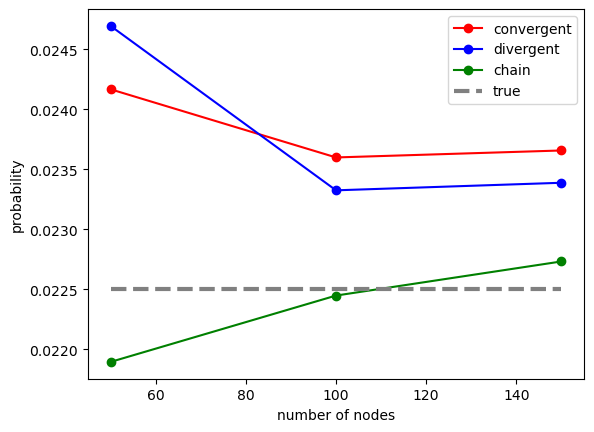

In [40]:
import numpy as np

nvec = np.arange(50,200,50)
p = 0.15
pcon_vec = []
pdiv_vec = []
pch_vec  = []
for n in nvec:
    er = nx.gnp_random_graph(n=n, p=p, seed=1, directed=True)
    A = nx.adjacency_matrix(er).todense().copy()
    n_con = 0
    n_div = 0
    n_ch  = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                n_ch += A[i,j]*A[j,k] # chain
                n_con+= A[i,j]*A[k,j] # convergent
                n_div+= A[i,j]*A[i,k] # divergent   
    pch = n_ch/n**3            
    pcon= n_con/n**3
    pdiv= n_div/n**3
    pcon_vec.append(pcon)
    pdiv_vec.append(pdiv)
    pch_vec.append(pch)
plt.plot(nvec,pcon_vec,label='convergent',color='red',marker='o')
plt.plot(nvec,pdiv_vec,label='divergent',color='blue',marker='o')
plt.plot(nvec,pch_vec,label='chain',color='green',marker='o')
plt.hlines(p**2, nvec[0], nvec[-1], linestyle='--', color='gray',linewidth=3, label='true')
plt.xlabel('number of nodes')
plt.ylabel('probability')
plt.legend()
plt.show()

# print(f'expected probability of 3-neuron motifs = {p**2}')

/tmp/ipykernel_70/2409202586.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(er).todense().copy()


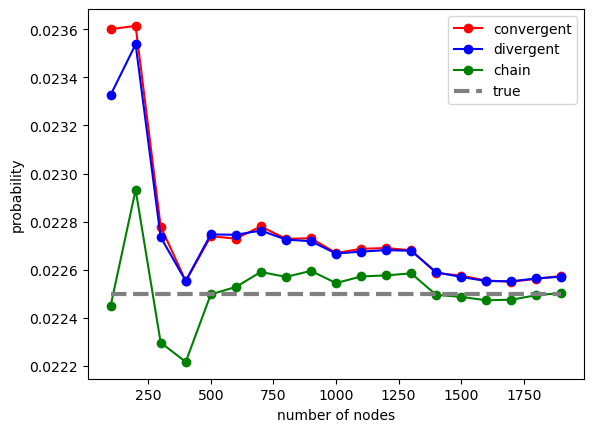

In [57]:
import numpy as np

nvec = np.arange(100,2000,100)
p = 0.15
pcon_vec = []
pdiv_vec = []
pch_vec  = []
for n in nvec:
    er = nx.gnp_random_graph(n=n, p=p, seed=1, directed=True)
    A = nx.adjacency_matrix(er).todense().copy()
    n_con  = np.sum(A@A.T)
    n_div = np.sum(A.T@A)
    n_ch = np.sum(A@A) 
    pch = n_ch/n**3            
    pcon= n_con/n**3
    pdiv= n_div/n**3
    pcon_vec.append(pcon)
    pdiv_vec.append(pdiv)
    pch_vec.append(pch)
plt.plot(nvec,pcon_vec,label='convergent',color='red',marker='o')
plt.plot(nvec,pdiv_vec,label='divergent',color='blue',marker='o')
plt.plot(nvec,pch_vec,label='chain',color='green',marker='o')
plt.hlines(p**2, nvec[0], nvec[-1], linestyle='--', color='gray',linewidth=3, label='true')
plt.xlabel('number of nodes')
plt.ylabel('probability')
plt.legend()
plt.savefig('erdos.png',bbox_inches='tight',dpi=200)
plt.show()

# print(f'expected probability of 3-neuron motifs = {p**2}')

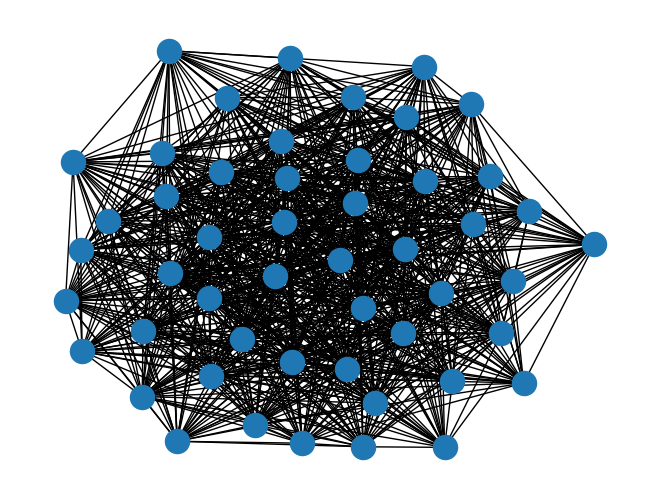

In [79]:
dist = lambda x, y: np.sqrt(sum((a-b)**2 for a, b in zip(x, y)))
G = nx.waxman_graph(n=50, beta=1, alpha=1, metric=dist)
nx.draw(G)
plt.show()

In [86]:
A = nx.adjacency_matrix(G).todense()
A

/tmp/ipykernel_70/770536199.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 1, 1, 0],
        [1, 0, 0, ..., 1, 1, 0],
        ...,
        [0, 1, 1, ..., 0, 0, 1],
        [0, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]])

/tmp/ipykernel_70/1476580010.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


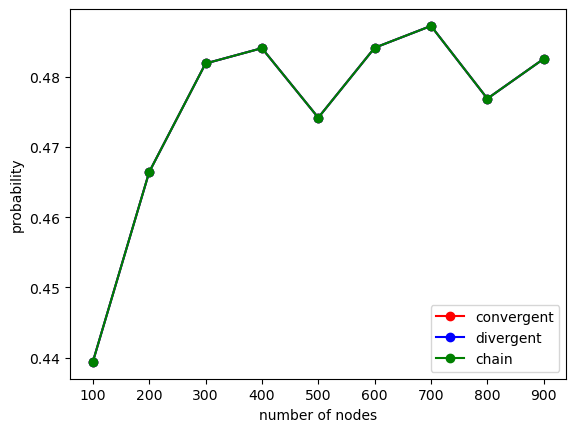

In [83]:


nvec = np.arange(100,1000,100)
# p = 0.15
pcon_vec = []
pdiv_vec = []
pch_vec  = []
for n in nvec:
    G = nx.waxman_graph(n=n, beta=1, alpha=1, metric=dist)
    A = nx.adjacency_matrix(G).todense()
    n_con  = np.sum(A@A.T)
    n_div = np.sum(A.T@A)
    n_ch = np.sum(A@A)
    pch = n_ch/n**3            
    pcon= n_con/n**3
    pdiv= n_div/n**3
    pcon_vec.append(pcon)
    pdiv_vec.append(pdiv)
    pch_vec.append(pch)
plt.plot(nvec,pcon_vec,label='convergent',color='red',marker='o')
plt.plot(nvec,pdiv_vec,label='divergent',color='blue',marker='o')
plt.plot(nvec,pch_vec,label='chain',color='green',marker='o')
# plt.hlines(p**2, nvec[0], nvec[-1], linestyle='--', color='gray',linewidth=3, label='true')
plt.xlabel('number of nodes')
plt.ylabel('probability')
plt.legend()
plt.savefig('wax.png',bbox_inches='tight',dpi=200)
plt.show()


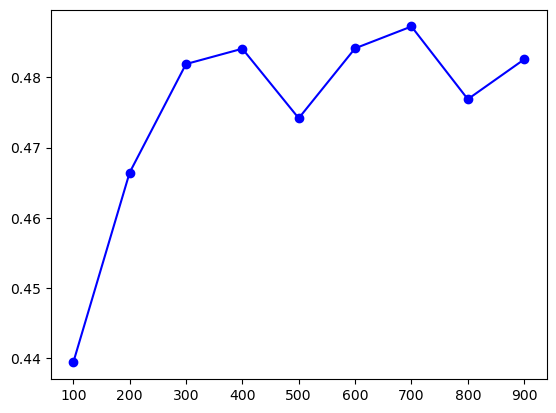

In [84]:
plt.plot(nvec,pdiv_vec,label='divergent',color='blue',marker='o')

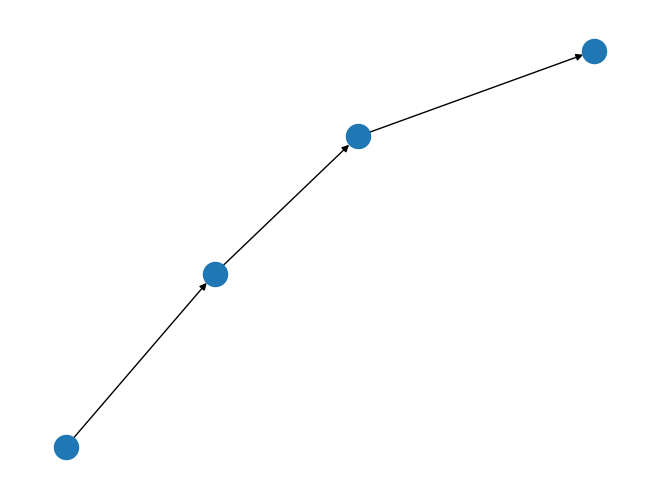

[0, 1, 1, 1]
[1, 1, 1, 0]


In [88]:
D = nx.DiGraph([(0, 1), (1, 2), (2, 3)])
nx.draw(D)
plt.show()
din = list(d for n, d in D.in_degree())
dout = list(d for n, d in D.out_degree())
print(din)
print(dout)